# Time Series Analysis: Superstore Dataset 

Time Series vs Supervised Machine Learning:
- Time Series work when we only have one column of the data available
- For multiple columns we can Supervised ML algos like Random Forest, XGBoost, etc as more predictor columns will bring more info and hence predictor will be better.
- For time series, ideal data is like one column of historical data on sales, demand, or any value to be predicted, we can generate predictions.

Installing the xlrd library to read data to read xls file using pandas

In [23]:
!pip install xlrd


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip


#### Reading the Data

In [24]:
import pandas as pd
import numpy as np

# Supressing scientific notations
np.set_printoptions(suppress=True)

StoreSalesData=pd.read_excel('../Datasets/StoreSalesData.xls')
StoreSalesData

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,Philippines,Southeast Asia,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,10996,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,New Zealand,Oceania,OFF-ST-10004748,Office Supplies,Storage,"Smead Lockers, Blue",396.840,2,0.00,59.520
10996,10997,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,New Zealand,Oceania,TEC-CO-10002678,Technology,Copiers,"Brother Wireless Fax, High-Speed",1508.040,4,0.00,437.280
10997,10998,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,New Zealand,Oceania,OFF-LA-10000959,Office Supplies,Labels,"Harbour Creations Round Labels, Alphabetical",6.570,1,0.00,0.630
10998,10999,ID-2012-83604,2012-08-28,2012-08-28,Same Day,PO-19195,Phillina Ober,Home Office,Gold Coast,Queensland,Australia,Oceania,FUR-BO-10002866,Furniture,Bookcases,"Safco Classic Bookcase, Pine",1582.200,6,0.40,-870.300


### Looking at the data summary

In [25]:
StoreSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         11000 non-null  int64         
 1   Order ID       11000 non-null  object        
 2   Order Date     11000 non-null  datetime64[ns]
 3   Ship Date      11000 non-null  datetime64[ns]
 4   Ship Mode      11000 non-null  object        
 5   Customer ID    11000 non-null  object        
 6   Customer Name  11000 non-null  object        
 7   Segment        11000 non-null  object        
 8   City           11000 non-null  object        
 9   State          11000 non-null  object        
 10  Country        11000 non-null  object        
 11  Region         11000 non-null  object        
 12  Product ID     11000 non-null  object        
 13  Category       11000 non-null  object        
 14  Sub-Category   11000 non-null  object        
 15  Product Name   1100

## **Problem Statement:**

- Superstore management wants to create a predictive model after analyzing their sales data, that can tell the sales quantity expected in the next month for each of the categories of products, ie. Furniture, Office Supplies and Technology

### Observing the Quantitative, Qualitative and Categorical variables in datam

In [26]:
StoreSalesData.nunique()

Row ID           11000
Order ID          5436
Order Date        1265
Ship Date         1378
Ship Mode            4
Customer ID        795
Customer Name      795
Segment              3
City               655
State              179
Country             23
Region               4
Product ID        2721
Category             3
Sub-Category        17
Product Name      1913
Sales             8815
Quantity            14
Discount            19
Profit            8120
dtype: int64

In this data, we can have two variables as time series forcasting: **Sales** and **Quantity**.

- **Sales** is the price value and can be derived using Quantity mutliplied by the cost associated with products.
- **Quantity** is the raw or base variables and should be selected for time series modelling.


Time series algorithm expects ONE column of data that to forecast furthur, but since this problem statement says to generate monthly predictions, we will aggregate the Quantity number monthly.

### Feature Engineering in data

In [27]:
StoreSalesData.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

- Separating month and year from 'Order Date' can be useful in future use.
- We can use that and generate Year and Month columns, which can be used for our aggrgation

In [28]:
# Function to get month from a date
def Function_get_month(inpDate):
    return (inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return (inpDate.year)

# Creating new columns
StoreSalesData['Month']=StoreSalesData['Order Date'].apply(Function_get_month)
StoreSalesData['Year']=StoreSalesData['Order Date'].apply(Function_get_year)

StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,8,2013
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420,8,2013
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,8,2013
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,8,2013
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,...,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,6,2014


In [29]:
print(StoreSalesData['Year'].nunique())
print(StoreSalesData['Month'].nunique())

4
12


- We need 2 year of data for time series modelling such that we can predict monthly sales.
- As one year will be one complete cycle, because all months from Jan to Dec will be used for analysis for pattern and next cycle will be repeating.
- Thus ideally, 2 years worth of data will be needed and data provides with 4 years, so can easily continue with analysis.

In [30]:
# Checking unique values in Year and Month columns
print("Unique values in Year Column: ", StoreSalesData['Year'].sort_values().unique())
print("Unique Values in Month Column: ", StoreSalesData['Month'].sort_values().unique())

Unique values in Year Column:  [2011 2012 2013 2014]
Unique Values in Month Column:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


#### Aggregating Sales Quantity for each month

Preparing data for time series modelling.

In [31]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=StoreSalesData['Month'],
            index=StoreSalesData['Year'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,328,361,442,406,517,631,388,737,722,837,856,1028
2012,531,425,427,427,901,924,380,978,728,1092,1068,847
2013,665,448,527,448,1228,1273,716,1307,1220,1021,1010,1120
2014,951,704,890,727,1284,1416,738,1478,1302,1588,1632,1548


The above data is in a matrix format, and time series expects data in one single column, thus by using **melt()** function can help arrange the data year-month wise in a single column.

In [32]:
# Converting the crosstabe data into one single column for Time Series
pd.crosstab(columns=StoreSalesData['Year'],
            index=StoreSalesData['Month'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum').melt()

,Year,value
0,2011,328
1,2011,361
2,2011,442
3,2011,406
4,2011,517
5,2011,631
6,2011,388
7,2011,737
8,2011,722
9,2011,837


#### Visualizing the Total sales Quantity per month

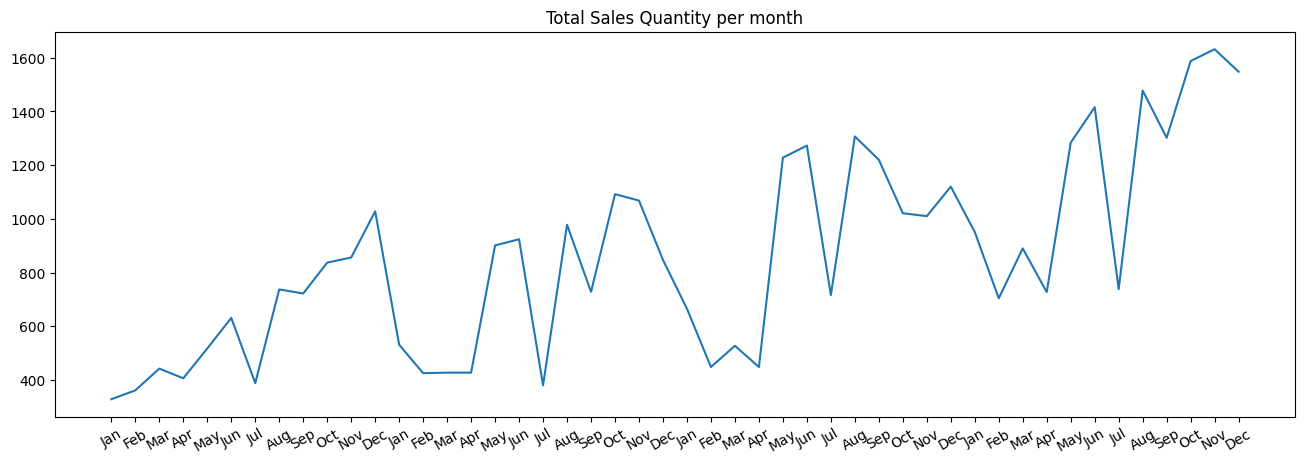

In [33]:
import matplotlib.pyplot as plt

SalesQuantity=pd.crosstab(columns=StoreSalesData['Year'],
                          index=StoreSalesData['Month'],
                          values=StoreSalesData['Quantity'],
                          aggfunc='sum').melt()['value']

# Taking data for 4 years
MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline

SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')

# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1), MonthNames, rotation=30)

Looking at the values present inside SalesQuantity variable

In [34]:
SalesQuantity.values

array([ 328,  361,  442,  406,  517,  631,  388,  737,  722,  837,  856,
       1028,  531,  425,  427,  427,  901,  924,  380,  978,  728, 1092,
       1068,  847,  665,  448,  527,  448, 1228, 1273,  716, 1307, 1220,
       1021, 1010, 1120,  951,  704,  890,  727, 1284, 1416,  738, 1478,
       1302, 1588, 1632, 1548], dtype=int64)

#### Each components is a combination of three factors listed below:
1. **Trend Component**:
    - This determines the trend of the time series, whether the overall trend is increasig or decreasing or constant.
2. **Seasonality Component**:
    - This determines the cyclic nature of the data, e.g ice cream sales will peak in summer and decline in the winter.
    - This cycle happens each year due to changing seasons, thus the period of high sales and dip of sales can be easily calculated.
3. **Residue Component**:
    - Also known as the error part of the time series that may require rather a complex analysis.
    - Such as, if something random happens and increases the sales of an item at an unexpected time of the year.

In [35]:
# !pip install statsmodels

In [36]:
import sys
!{sys.executable} -m pip install statsmodels


[notice] A new release of pip is available: 23.3.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


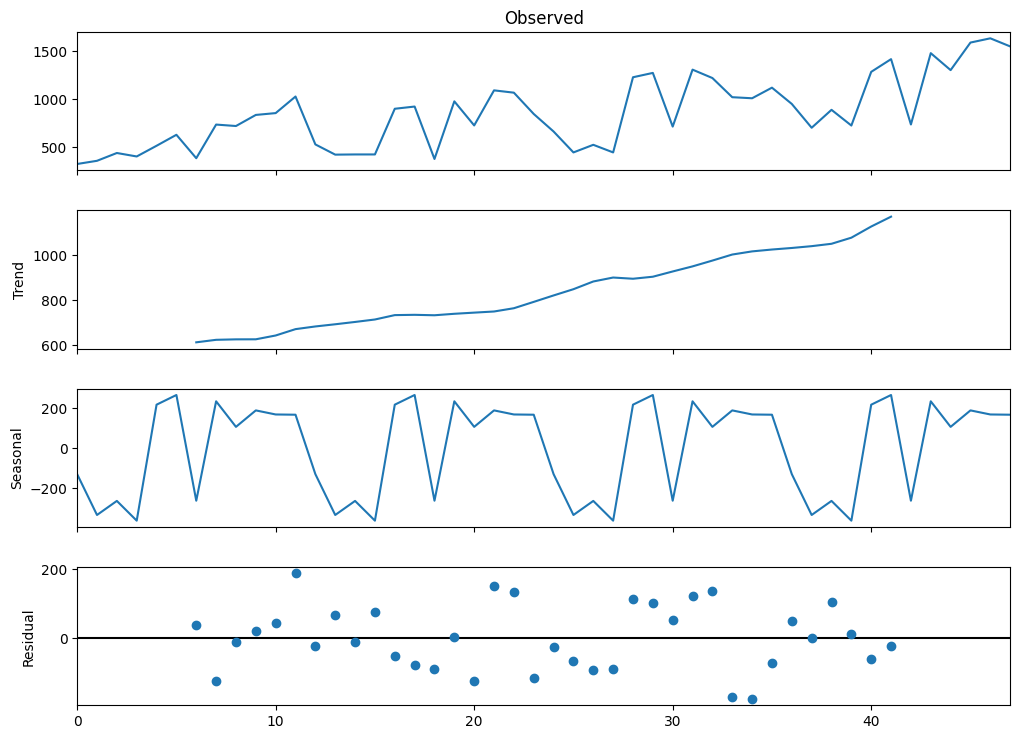

In [37]:
# Decomposing the Sales numbers in the Time Series data
from statsmodels.tsa.seasonal import seasonal_decompose
series=SalesQuantity.values
result=seasonal_decompose(series, period=12)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

# SARIMA Time Series Algorithm
- It performs better than ARIMA because it models the seasonal patterns separately hence providing more accurate predictions.
- SARIMA has two sets of order parameters:
    - **order** and **seasonal_order** both take their own (p,d,q) parameters.

### ARIMA Time series has (p,d,q) parameters,

ARIMA is short form of **A**uto-**R**egressive (**p**) **I**ntegrated (**d**) Moving Average (**q**) models.

<html><img src="https://thinkingneuron.com/wp-content/uploads/2024/03/image-6.png"></html>

**p**:
    - How many Auto Regressive (AR) components to keep in the ARIMA Time Series Equation.
    - E.g. ARIMA (2,0,0) means there will be 2 AR terms in the equation.

<html><img src="https://thinkingneuron.com/wp-content/uploads/2024/03/image-8-1024x198.png"></html>

**d**:
    - What is the order of differencing in the time series?
    - E.g. ARIMA (2,1,0) means there will be 2 AR terms that are differnced at order-1 in the Time Series equation.

<html><img src="https://thinkingneuron.com/wp-content/uploads/2024/03/image-9-1024x127.png"></html>

**q**:
    - How many Moving Average (MA) components should be kept in the ARIMA Time Series Equation?
    - E.g. ARIMA (2,1,3) means there will be 2 AR components, 1st order differencing and 3 MA components in the equaton.

<html><img src="https://thinkingneuron.com/wp-content/uploads/2024/03/image-10-1024x326.png"></html>

When we have the SARIMA model then there are more components in the equation as components in the equation as compared to ARIMA which handles the seasonal part separately.

For equation of SARIMA(order=(2,1,3), seasonal_order=(2,0,3)) will look like,

<html><img src="https://thinkingneuron.com/wp-content/uploads/2024/03/image-11-1024x565.png"></html>

### **How to find the best values of p,d,q?**

- The best values of p,d,q parameters can be found by trying out multiple values and measuring the accuracy for each combination.

- The combination that generated the highest accuracy is the best one. This process is also known as **hyperparameter tuning!**

- Since using SARIMA, need to tune 6 parameters:
    - (p,d,q) for order
    - (p,d,q) for seasonal_order

### Function to find best (p,d,q) parameters for SARIMA model

In [38]:
# Creating the function to find best values of p,d,q for SARIMA
def FunctionTuneArima(inpData, p_values, d_values, q_values, 
                      seasonal_p_values, seasonal_d_values, seasonal_q_values,cycle):
    # Supressing warning messages
    import warnings
    warnings.filterwarnings(action='ignore')
    
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    # Fitting the model for each set of values passed
    
    # Creating an empty data frame to store
    Results=pd.DataFrame()
    
    # Trying the values
    for p_value in p_values:
        for d_value in d_values:
            for q_value in q_values:
                for seasonal_p_value in seasonal_p_values:
                    for seasonal_d_value in seasonal_d_values:
                        for seasonal_q_value in seasonal_q_values:
                            
                            try:
                                model = SARIMAX(inpData, 
                                    order=(p_value,d_value,q_value), 
                                    seasonal_order =(seasonal_p_value, 
                                                     seasonal_d_value,
                                                     seasonal_q_value,
                                                     cycle))
                                model_fit=model.fit(disp=False)
                                pred = model_fit.predict(0, len(inpData))
                                Acc=100- np.mean(abs(pred-inpData)/inpData*100)
                                
                                Results=pd.concat([Results,pd.DataFrame([[p_value,
                                                                   d_value,
                                                                   q_value,
                                                                   seasonal_p_value,
                                                                   seasonal_d_value,
                                                                   seasonal_q_value,
                                                                   Acc]],
                                                                   columns=["p","d","q",
                                                                           "seasonal_p",
                                                                           "seasonal_d",
                                                                           "seasonal_q",
                                                                           "Accuracy"
                                                                           ] )])

                            except:
                                pass
    return(Results)

In [39]:
# Calling the function to get the best values
# This can take some time because there are multiple combinations
# Cycle=12 because this is monthly data
ResultData=FunctionTuneArima(inpData=SalesQuantity,
                            p_values=[0,1], 
                            d_values=[0,1], 
                            q_values=[1,10], 
                            seasonal_p_values=[1,2],                                       
                            seasonal_d_values=[0], 
                            seasonal_q_values=[0],
                            cycle=12
                  )

In [40]:
# Sorting the results to get the 10 best combinations
ResultData.sort_values('Accuracy', ascending=False).head(10)

,p,d,q,seasonal_p,seasonal_d,seasonal_q,Accuracy
0,1,0,10,2,0,0,79.959766
0,1,0,10,1,0,0,79.731996
0,1,1,10,1,0,0,79.224296
0,0,1,10,1,0,0,79.150968
0,1,1,10,2,0,0,79.021206
0,0,1,10,2,0,0,79.012171
0,1,1,1,2,0,0,78.655535
0,1,1,1,1,0,0,78.604054
0,1,0,1,2,0,0,78.381977
0,1,0,1,1,0,0,78.057303


- Best values for order (p,d,q)=(1,0,10) and for seasonal_order(p,d,q)=(2,0,0).
- The Cycle=12 is constant because this is monthly data.


Creating the Time Series Model using the best hyperparameters

In [42]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

Training and testing the model on full dataset

Next Six Month Forecast:
 49     984.987070
50    1065.573962
51     929.263430
52    1510.206427
53    1630.321392
54    1109.732637
Name: Forecast, dtype: float64
#### Accuracy of model: 79.96 ####


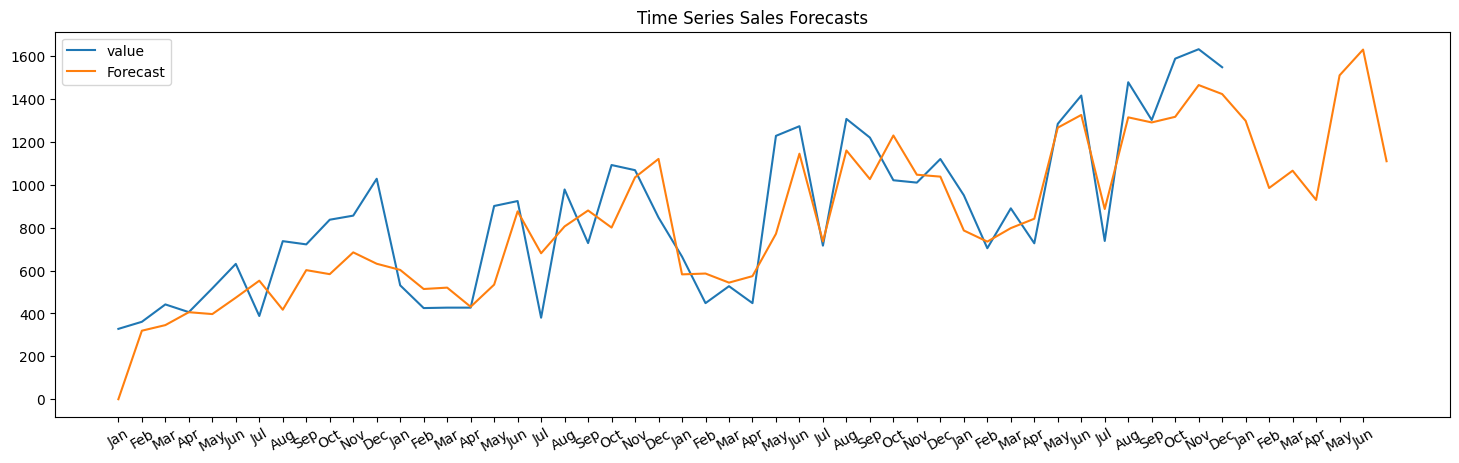

In [44]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = SARIMAX(SalesQuantity,  
                        order = (1, 0, 10),  
                        seasonal_order =(2, 0, 0, 12))

 # Fitting the Time series model on the data
SalesModel = SarimaxModel.fit(disp=False)
  
# Forecast for the next 6 months
FutureMonths=6
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantity)) + FutureMonths,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:\n",forecast[-FutureMonths:])

# Plot the forecast values
SalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

# Measuring the Training accuracy of the model
MAPE=np.mean(abs(SalesQuantity-forecast)/SalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
PlotMonthNames=MonthNames+MonthNames[0:FutureMonths]
plotLabels=plt.xticks(np.arange(0,len(PlotMonthNames),1),PlotMonthNames, rotation=30)

The forecast for the unit sales of all the categories in the next 6 months has training accuracy of **79%**.

#### For how many future months the predictions can be made using Time Series?
- Predictions for any number of months can be made using time series, like 3, 11, 24 months,etc.
- However the recommendation is not more than 6 months.
    - As with every changing month the data changes, hence ideally the model should be retrained every month with the latest data and then the future predictions should be revised.

#### **How can I improve the predictions?**

- The first logical step is to bring more data. Especially since it is a univariate modelling technique, the more number of years worth of data the better it is.
- Drilling down the data into categories/sub-categories may hel to capture the data patterns better.
- For eg. Time series created above captures the sales patterns for all the categories put together. If we create one Time series for one category then it will do better predictions.

- In the below aggregation, observation can be made in the data at the category level. Based on the total sales we can prioritize which category’s Time Series should be created first.

- Can also perform data transformation like Square root, log of the SalesQuantity variable to improve the model fit accuracy and the prediction accuracy.

In [46]:
StoreSalesData

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,8,2013
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420,8,2013
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,8,2013
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,8,2013
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,...,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,10996,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,...,OFF-ST-10004748,Office Supplies,Storage,"Smead Lockers, Blue",396.840,2,0.00,59.520,9,2013
10996,10997,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,...,TEC-CO-10002678,Technology,Copiers,"Brother Wireless Fax, High-Speed",1508.040,4,0.00,437.280,9,2013
10997,10998,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,...,OFF-LA-10000959,Office Supplies,Labels,"Harbour Creations Round Labels, Alphabetical",6.570,1,0.00,0.630,9,2013
10998,10999,ID-2012-83604,2012-08-28,2012-08-28,Same Day,PO-19195,Phillina Ober,Home Office,Gold Coast,Queensland,...,FUR-BO-10002866,Furniture,Bookcases,"Safco Classic Bookcase, Pine",1582.200,6,0.40,-870.300,8,2012


In [48]:
# Aggregating the data at Category level
StoreSalesData.groupby(['Category']).sum(numeric_only=True)

,Row ID,Sales,Quantity,Discount,Profit,Month,Year
Category,,,,,,,
Furniture,13299177,1.343623e+06,9096,335.49,125927.2905,17839,4887064
Office Supplies,33974643,8.843154e+05,23133,974.29,105512.4025,45768,12430938
Technology,13231680,1.357490e+06,8993,327.15,204593.8560,17465,4822535


### Time Series only for the Office Supplies category

In [49]:
# Filtering only Office Supplies data
OfficeSupplySalesData=StoreSalesData[StoreSalesData['Category']=='Office Supplies']

In [50]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=OfficeSupplySalesData['Month'],
            index=OfficeSupplySalesData['Year'],
            values=OfficeSupplySalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,214,177,241,259,258,312,229,361,449,473,467,588
2012,265,215,225,246,539,543,217,562,465,615,610,513
2013,349,238,283,237,738,719,367,729,658,565,521,637
2014,547,363,439,391,758,833,410,903,705,892,916,892


### Visualizing the Sales data for the Office Supplies Category

Once we filtered the data only for the Office Supplies category, observations can show slightly different trends in the data, and that makes sense because we are focussing on the sales of one particular category.

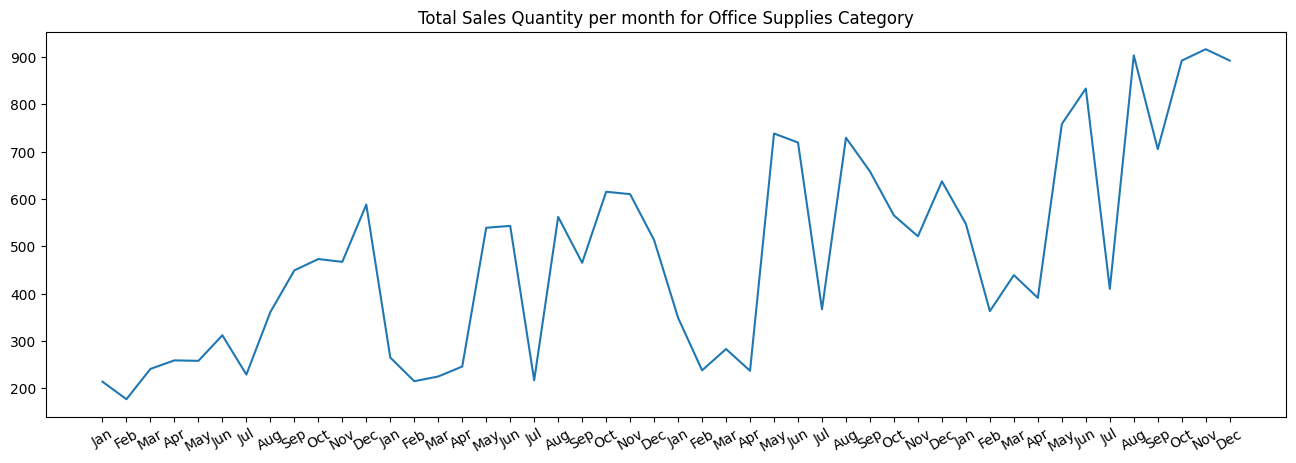

In [51]:
import matplotlib.pyplot as plt
SalesQuantity=pd.crosstab(columns=OfficeSupplySalesData['Year'],
            index=OfficeSupplySalesData['Month'],
            values=OfficeSupplySalesData['Quantity'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Office Supplies Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

### Taking Log of SalesQuantity
Taking a log is one of the top data transformations for continuous variables in Machine Learning while trying to improve the model fit, just make sure to check there are no zero values in the data before taking LOG. Here, taking the log of the Sales Quantity column will improve the model fit as well as the accuracy.

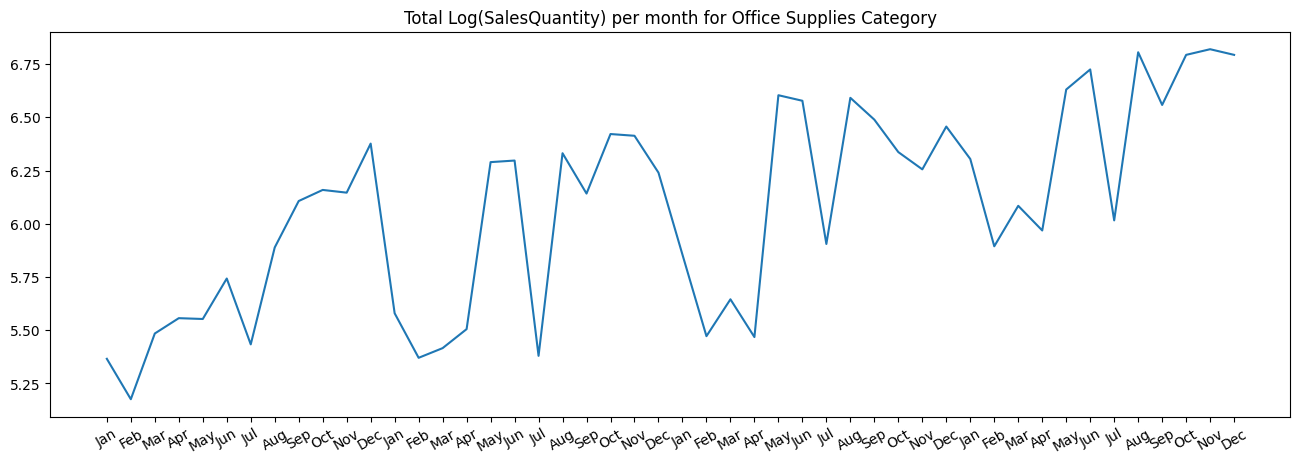

In [53]:
## Taking Log of the SalesQuantity
SalesQuantityLOG=np.log(SalesQuantity)

# Plotting the sales quantity after LOG transformation
SalesQuantityLOG.plot(kind='line', figsize=(16,5), title='Total Log(SalesQuantity) per month for Office Supplies Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

At the y-axis here, the values are now small due to the log transformation, however, the data pattern is exactly the same as it was before taking the log.

### Finding best hyperparameters(p,d,q) for SARIMA model
Calling the same function that defined above to find the best hyperparameters for SARIMA model of the Office supplies category.

In [54]:
# Calling the function defined above to get the best values
# This can take some time because there are multiple combinations!
# Cycle=12 because this is monthly data
ResultsData=FunctionTuneArima(inpData=SalesQuantityLOG,
                  p_values=[0,10], 
                  d_values=[0], 
                  q_values=[0,5],  
                  seasonal_p_values=[0,2],                                       
                  seasonal_d_values=[0], 
                  seasonal_q_values=[0,1,3],
                  cycle=12
                 )

In [55]:
# Sorting the results to get the 10 best values
ResultsData.sort_values('Accuracy', ascending=False).head(10)

,p,d,q,seasonal_p,seasonal_d,seasonal_q,Accuracy
0,10,0,5,2,0,3,94.741013
0,10,0,5,2,0,1,94.733390
0,10,0,5,2,0,0,94.686336
0,10,0,5,0,0,3,94.640693
0,10,0,0,2,0,3,94.585803
0,10,0,0,2,0,1,94.581110
0,10,0,0,2,0,0,94.566566
0,10,0,0,0,0,3,94.454225
0,10,0,0,0,0,1,94.078057
0,10,0,5,0,0,1,94.041332


- Notice that the accuracy numbers are very high after the log transformation.
- It is important to understand this is not the final accuracy because these numbers were achieved on a transformed data, will have to convert the data to original scale before computing accuracy.

### Creating the Time Series for Office Supplies Category
Creating Time Series only for the Office supplies Category using the best hyperparameters,
- **order** = (10, 0, 5)
- **seasonal_order** =(2, 0, 3). 

The cycle remains 12 as this is a monthly Time Series.

Next Six Month Forecast:
 49     450.039109
50     468.648743
51     440.182474
52    1128.771431
53    1165.168147
54     492.366224
Name: Forecast, dtype: float64
#### Accuracy of model: 80.16 ####


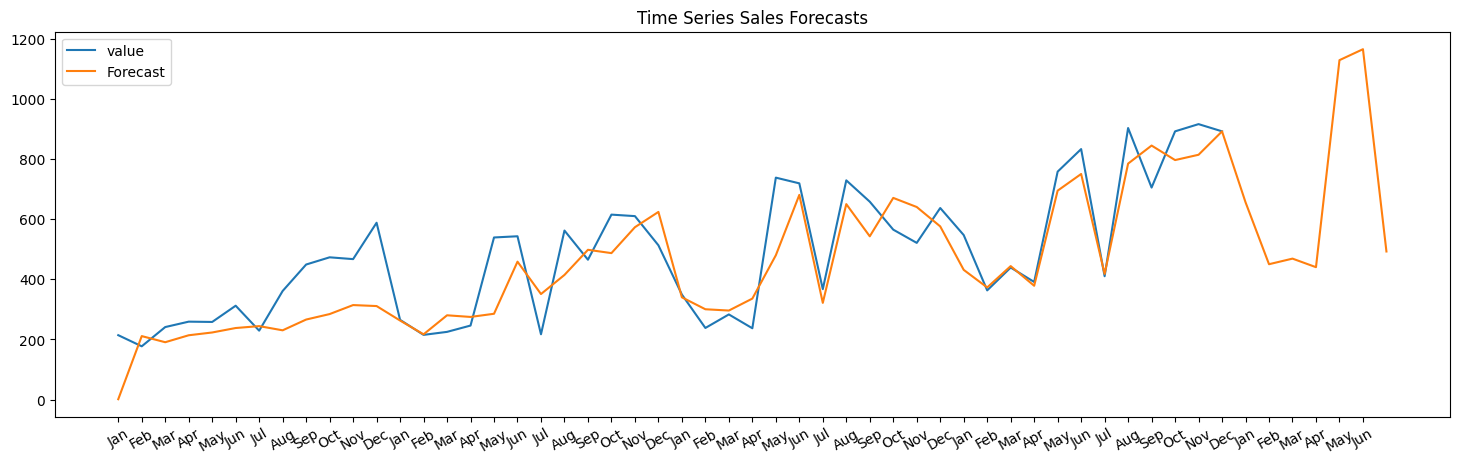

In [56]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Train the model on the full dataset 
SarimaxModel = model = SARIMAX(SalesQuantityLOG, 
                        order = (10, 0, 5),  
                        seasonal_order =(2, 0, 3, 12))

# Fitting the Time series model on the LOG scale data
SalesModel = SarimaxModel.fit(disp=False)
  
# Forecast for the next 6 months
FutureMonths=6
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantityLOG)) + FutureMonths,
                          typ = 'levels').rename('Forecast')

# Bringing the forecast to the original scale by taking antilog
forecast=np.exp(forecast)

print("Next Six Month Forecast:\n",forecast[-FutureMonths:])

# Plot the forecast values
# Using Original scale SalesQuantity for plot
SalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

# Measuring the Training accuracy of the model
# Using Original scale SalesQuantity for accuracy computation
MAPE=np.mean(abs(SalesQuantity-forecast)/SalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
PlotMonthNames=MonthNames+MonthNames[0:FutureMonths]
plotLabels=plt.xticks(np.arange(0,len(PlotMonthNames),1),PlotMonthNames, rotation=30)

## Conclusion

- Choosing the right algorithm for a business problem is important.
- Chosen Time Series because as had the business problem of predicting the Sales Quantity for the next few months and in the given data most of the columns were Qualitative except for Sales and Quantity.
- Since Sales is derived using Quantity, hence using Quantity as the variable to fit Time Series because its a RAW variable and its preferred over a derived variable.
- Time Series Modelling completed.